In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import rc
from scipy.stats import chi2

In [2]:
min_, max_ = 0.,8
x = np.linspace(min_,max_,100)

In [3]:
n = 0
df = 2*(n+1)

In [4]:
# Upper limit
upper = 0.5*chi2.ppf(0.95,df = df)
print(upper)

2.9957322735539895


In [5]:
y = chi2.pdf(x,df=df)

In [6]:
def SetStyle(ax,x,y,xlabel_,ylabel_,scale_=1., fontsize_=16):
    
    ticks_x = ticker.FuncFormatter(lambda x,pos:'{:.2f}'.format(x/scale_))
    ax.xaxis.set_major_formatter(ticks_x)

    ticks_y = ticker.FuncFormatter(lambda y,pos:'{:.2f}'.format(y/scale_))
    ax.yaxis.set_major_formatter(ticks_y)

    ax.tick_params(axis='both', which='major', labelsize=12)

    ax.set_xlim(x[0],x[-1])
    ax.set_ylim(np.min(y),np.max(y))
    
    ax.set_xlabel(r'$'+xlabel_+'$',fontsize=fontsize_)
    ax.xaxis.set_label_coords(0.96, -0.1)

    if ylabel_ == '':
        ax.set_ylabel('',fontsize=fontsize_)
    else:    
        ax.set_ylabel(r'$'+ylabel_+'$',fontsize=fontsize_)
        
    ax.yaxis.set_label_coords(-0.1, 0.96)

    ax.legend(loc=1,prop={'size': 14})   

In [7]:
def GetFigure(x,y,name_=''):
    
    fig = plt.figure(figsize=(6,6),dpi=100)
    ax = fig.add_subplot(1,1,1)
    
    ax.plot(x,y,'k',lw=2,label=r'$\chi^{2}(\mu, k=2(N_{o}+1))$')
    
    ax.axvline( x = upper, color='r', linestyle='--', label=r'$\mu^{up}$: %.3f'%(upper) )
    ax.axvline( x = 2*upper, color='b', linestyle='--', label=r'$2\mu^{up}$: %.3f'%(2*upper) )

    upper_ = np.linspace(2*upper,max_,100)
    ax.fill_between(upper_,0,chi2.pdf(upper_,df=df),color='b')

    SetStyle(ax,x,y,xlabel_='\mu',ylabel_='')
    
    folder = '../Figures/'
    folder += name_
    
    plt.savefig(folder)

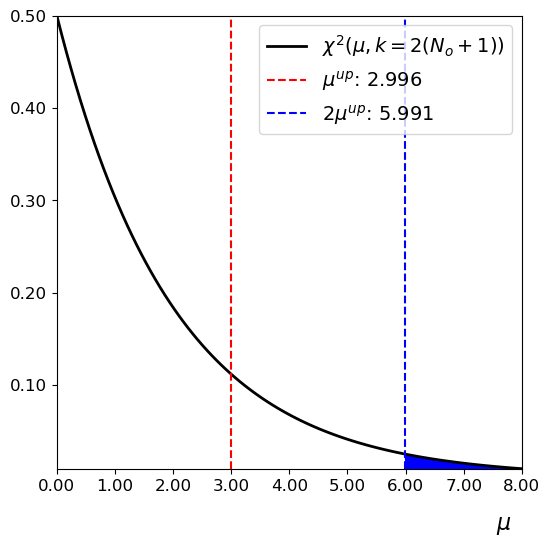

In [8]:
GetFigure(x,y,name_='Frequentist_UpperL.pdf')

In [9]:
chi2.cdf(2*upper,df=df)

0.95